In [8]:
%pylab inline

import pandas as pd

rcParams['axes.grid'] = True
rcParams['figure.figsize'] = (12,8)

Populating the interactive namespace from numpy and matplotlib


In [93]:
data = pd.read_csv('BTC-25SEP20.csv')
data.index = pd.to_datetime(data.timestamp * 1000000)
data = data.drop(['Unnamed: 0','timestamp'],axis=1)
data['sgn_amount'] = (-1*(data.direction == 'sell') + 1*(data.direction == 'buy'))*data.amount
print('ticks: %d'%(len(data)))
print('time:  %d hrs'%((data.index[-1] - data.index[0]).total_seconds()/3600)) 

ticks: 2550
time:  1 hrs


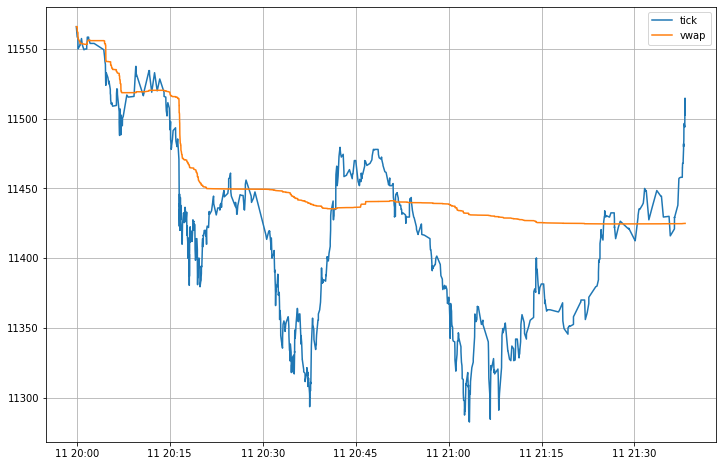

In [94]:
plot(data.price,label='tick')
plot((data.price*data.amount).cumsum()/data.amount.cumsum(),label='vwap')
legend(loc='upper right')

In [95]:
def sample(sample_tenor='5T',label='right'):
    sample_df = pd.DataFrame()
    sample_df['amount'] = data.amount.resample(sample_tenor,label=label).sum()
    sample_df['vwap'] = (data.amount*data.price).resample(sample_tenor,label=label).sum() / sample_df.amount
    sample_df['open'] = data.price.resample(sample_tenor,label=label).apply(lambda x: x.iloc[0])
    sample_df['close'] = data.price.resample(sample_tenor,label=label).apply(lambda x: x.iloc[-1])
    sample_df['high'] = data.price.resample(sample_tenor,label=label).max()
    sample_df['low'] = data.price.resample(sample_tenor,label=label).min()
    return sample_df

In [96]:
sample('15T').head()

,amount,vwap,open,close,high,low
timestamp,,,,,,
2020-08-11 20:00:00,770.0,11565.967532,11566.0,11565.5,11566.0,11565.5
2020-08-11 20:15:00,866190.0,11519.014142,11558.5,11501.0,11558.5,11488.0
2020-08-11 20:30:00,2454720.0,11424.854554,11495.5,11426.0,11498.0,11379.5
2020-08-11 20:45:00,813230.0,11383.397735,11417.0,11470.0,11479.5,11293.5
2020-08-11 21:00:00,2076650.0,11443.771721,11470.0,11368.0,11478.0,11367.5


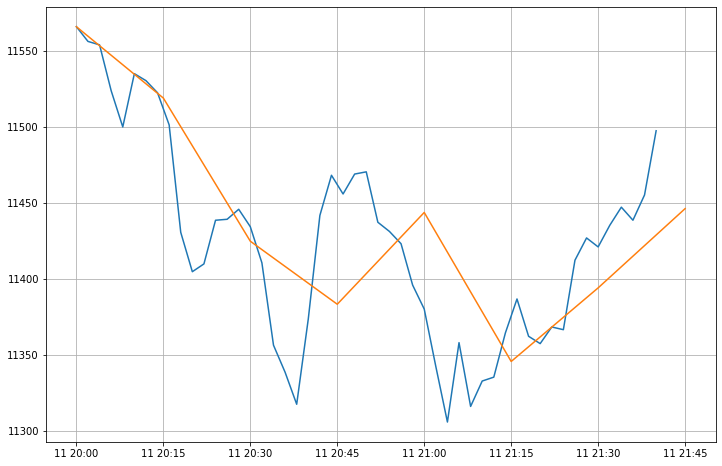

In [97]:
plot(sample('2T').vwap)
plot(sample('15T').vwap)

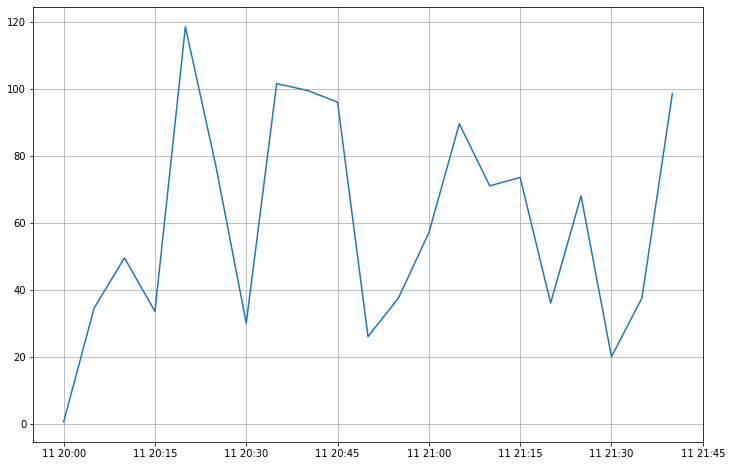

In [98]:
plot(sample('5T').high - sample('5T').low)